# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a13d29f41787b86f3519342438f64cd
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palmer
Processing Record 2 of Set 1 | smithers
Processing Record 3 of Set 1 | barcelos
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | mabaruma
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | gabu
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | morondava
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | dapa
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | tofol
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | jamestown
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palmer,42.1584,-72.3287,77.61,65,100,10.36,US,1691696620
1,smithers,54.7804,-127.1743,64.72,55,75,2.30,CA,1691696423
2,barcelos,41.5388,-8.6151,75.92,88,7,3.29,PT,1691696620
3,grytviken,-54.2811,-36.5092,28.36,97,94,7.83,GS,1691696439
4,mabaruma,8.2000,-59.7833,87.06,63,51,7.99,GY,1691696621


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palmer,42.1584,-72.3287,77.61,65,100,10.36,US,1691696620
1,smithers,54.7804,-127.1743,64.72,55,75,2.30,CA,1691696423
2,barcelos,41.5388,-8.6151,75.92,88,7,3.29,PT,1691696620
3,grytviken,-54.2811,-36.5092,28.36,97,94,7.83,GS,1691696439
4,mabaruma,8.2000,-59.7833,87.06,63,51,7.99,GY,1691696621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

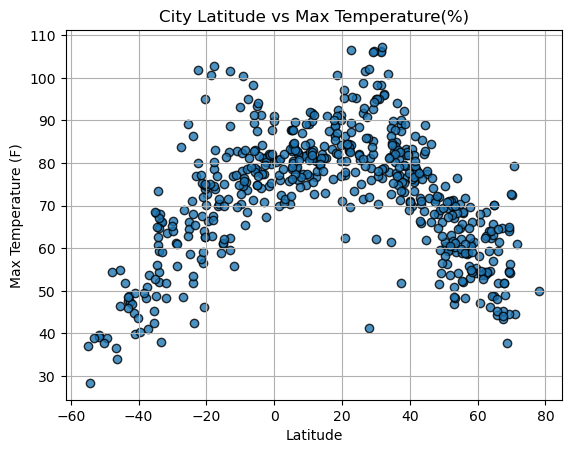

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature(%)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

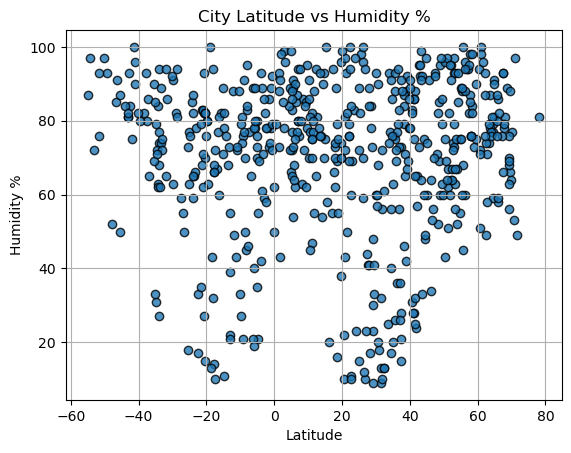

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

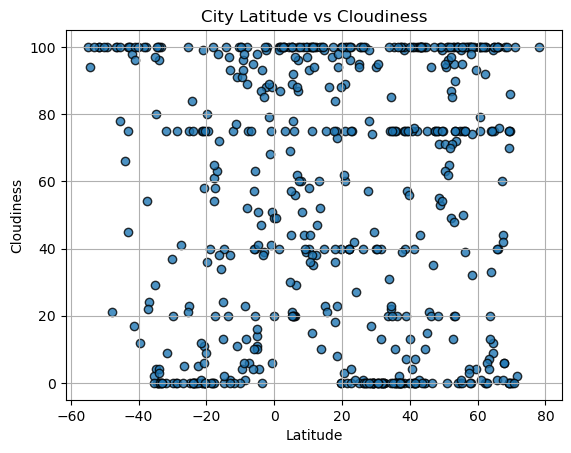

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=.8,label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

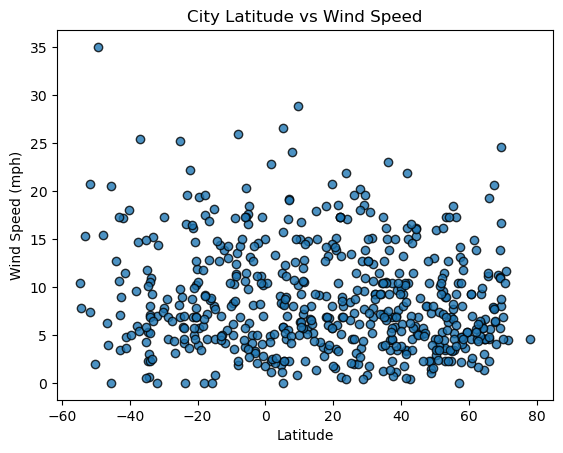

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, variable, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) =linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()



    

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palmer,42.1584,-72.3287,77.61,65,100,10.36,US,1691696620
1,smithers,54.7804,-127.1743,64.72,55,75,2.30,CA,1691696423
2,barcelos,41.5388,-8.6151,75.92,88,7,3.29,PT,1691696620
4,mabaruma,8.2000,-59.7833,87.06,63,51,7.99,GY,1691696621
6,gabu,12.2833,-14.2167,76.78,94,100,5.57,GW,1691696621


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,28.36,97,94,7.83,GS,1691696439
5,puerto ayora,-0.7393,-90.3518,87.76,92,51,7.00,EC,1691696452
8,port lincoln,-34.7333,135.8667,48.67,79,4,5.32,AU,1691696616
9,puerto natales,-51.7236,-72.4875,39.58,76,100,7.36,CL,1691696336
10,port mathurin,-19.6833,63.4167,72.84,80,36,19.37,MU,1691696621


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6755012550279896


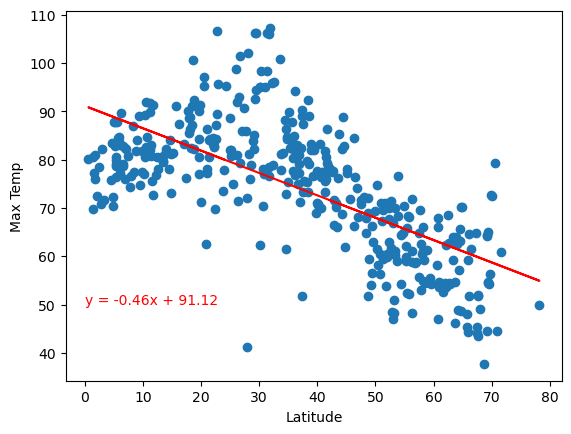

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (0,50))



The r-squared is: 0.7824675967274574


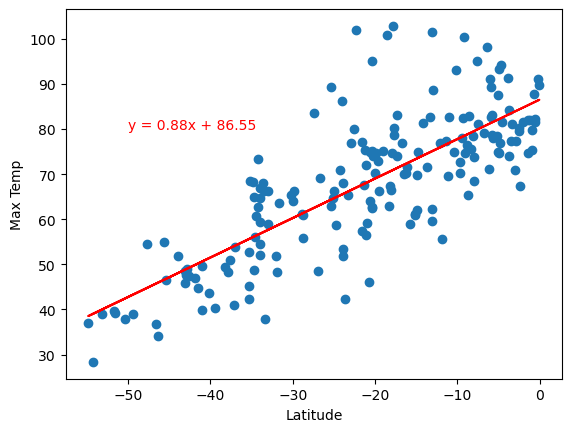

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (-50,80))

**Discussion about the linear relationship:** As anticpated, the linear regressions show that the further away from the equater (0 latitude) a city is, the lower the max temp will be. With an r-squared nearing .8, you can assume there is a pretty strong correlation between latitude and temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05552223388815043


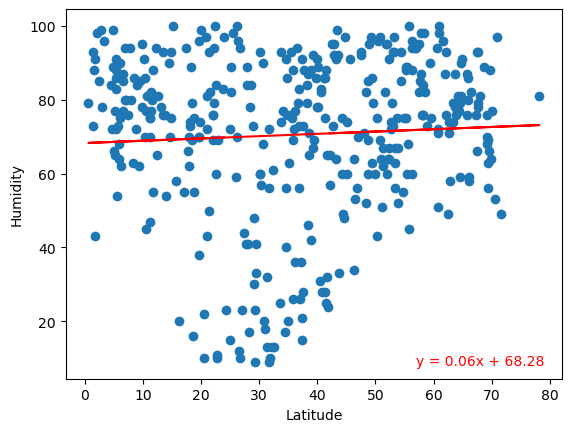

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.ylabel("Humidity")

plot_linear_regression(x_values, y_values, 'Humidity', (57,8))

The r-squared is: -0.22813022502623115


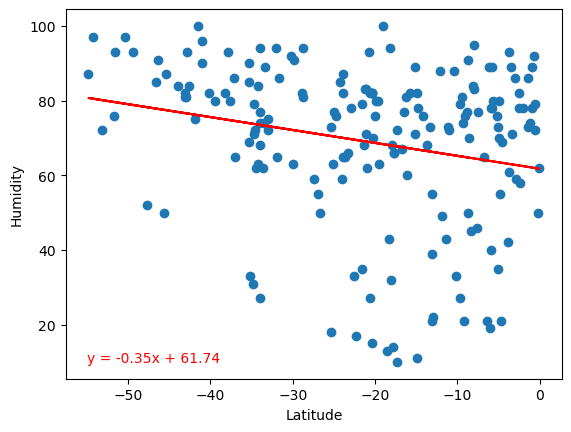

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.ylabel("Humidity")

plot_linear_regression(x_values, y_values, "Humidity", (-55,10))

**Discussion about the linear relationship:** Surprisngly, based on the sampe of cities, latitude does not seem to strongly correlate with humidty in either hemisphere. Low r-squared values, and almost no slope indicate that regardless of latitude, the humidity is pretty much a toss up. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.06616170140174128


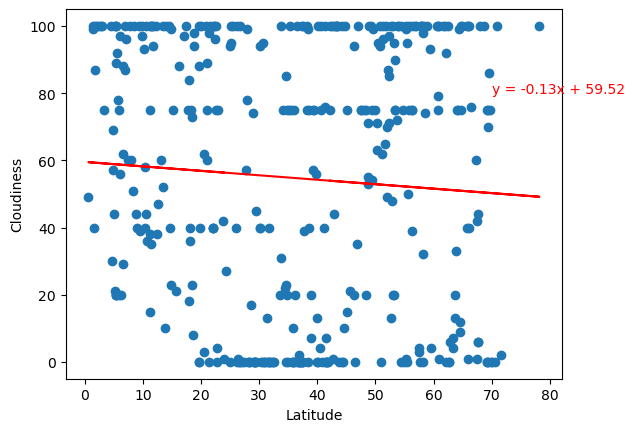

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")

plot_linear_regression(x_values, y_values, 'Cloudiness', (70,80))

The r-squared is: -0.10915287010303895


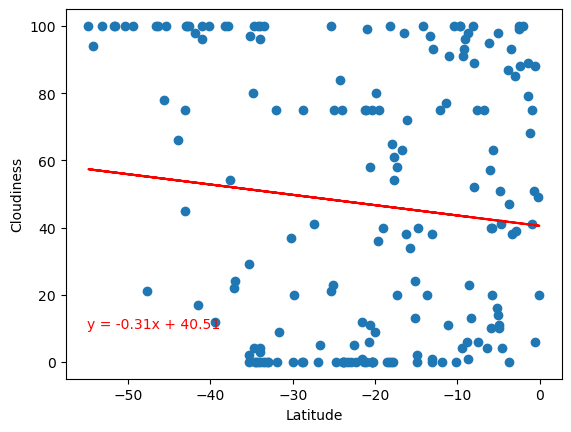

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")

plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))

**Discussion about the linear relationship:** similar to humidity, the correlation between latitude and cloudiness is almost non-existant. Both the northern and southern hemisphere's have low r-squared values. Both hemispheres also have shallow, almost flat slopes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.09924431750186948


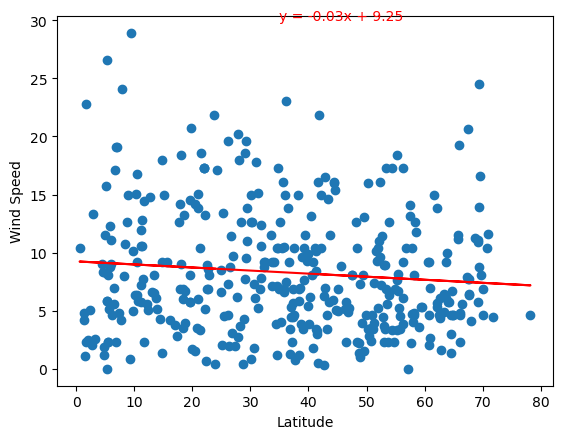

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")

plot_linear_regression(x_values, y_values, 'Wind Speed', (35,30))

The r-squared is: -0.02296096183466817


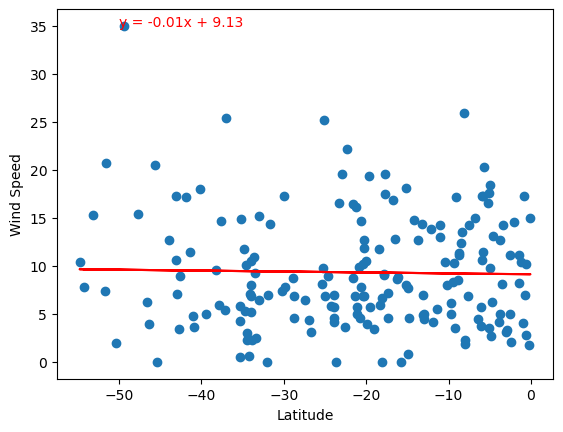

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")

plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 35))

**Discussion about the linear relationship:** Wind speed has a stronger correlation with the southern hemisphere (those good ole southern trade winds) based on latitude than it does the northern hemisphere. It's a negative correlation though, meaning the further away from the equator, the quicker the wind speed. 